Recurrent Neural Network

DATA PREPROCESSING

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Importing the training set


In [4]:
dataset_train = pd.read_csv("Google_Stock_Price_Train.csv")
training_set = dataset_train.iloc[:,1:2].values
print(training_set)

[[325.25]
 [331.27]
 [329.83]
 ...
 [793.7 ]
 [783.33]
 [782.75]]


In [5]:
from sklearn.preprocessing import MinMaxScaler


In [6]:
sc = MinMaxScaler(feature_range= (0,1))
training_set_scaled = sc.fit_transform(training_set)

Creating a data Structure with  60 timesteps and 1 output

In [7]:
X_train = []
y_train = []
for i in range(60,1258):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)


Resphaping
Based on Keras Document, RNN have 3D tensor input


In [8]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

BUILDING THE RNN - LSTM

In [3]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [28]:
regressor = Sequential()


In [29]:
regressor.add(LSTM(units= 50, return_sequences= True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [30]:
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))


In [31]:
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))


In [32]:
regressor.add(Dense(units=1))

In [33]:
regressor.compile(optimizer='RMSprop', loss='mean_squared_error')

In [34]:
regressor.fit(X_train, y_train, epochs= 100, batch_size=32)

Epoch 1/100
38/38 [==============================] - 8s 69ms/step - loss: 0.0336
Epoch 2/100
38/38 [==============================] - 3s 68ms/step - loss: 0.0144
Epoch 3/100
38/38 [==============================] - 3s 86ms/step - loss: 0.0124
Epoch 4/100
38/38 [==============================] - 3s 68ms/step - loss: 0.0096
Epoch 5/100
38/38 [==============================] - 2s 65ms/step - loss: 0.0088
Epoch 6/100
38/38 [==============================] - 3s 66ms/step - loss: 0.0082
Epoch 7/100
38/38 [==============================] - 2s 65ms/step - loss: 0.0082
Epoch 8/100
38/38 [==============================] - 3s 71ms/step - loss: 0.0070
Epoch 9/100
38/38 [==============================] - 3s 68ms/step - loss: 0.0071
Epoch 10/100
38/38 [==============================] - 3s 68ms/step - loss: 0.0068
Epoch 11/100
38/38 [==============================] - 3s 68ms/step - loss: 0.0061
Epoch 12/100
38/38 [==============================] - 3s 67ms/step - loss: 0.0062
Epoch 13/100
38/38 [=====

Predict

In [16]:
dataset_test = pd.read_csv("Google_Stock_Price_Test.csv")
real_stock_price = dataset_test.iloc[:, 1:2].values

In [17]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']),axis=0 )

In [22]:
inputs = dataset_total[len(dataset_total)-len(dataset_test)-60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.fit_transform(inputs)

In [23]:
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test= np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [35]:
predict_stock_price  = regressor.predict(X_test)
predict_stock_price = sc.inverse_transform(predict_stock_price)

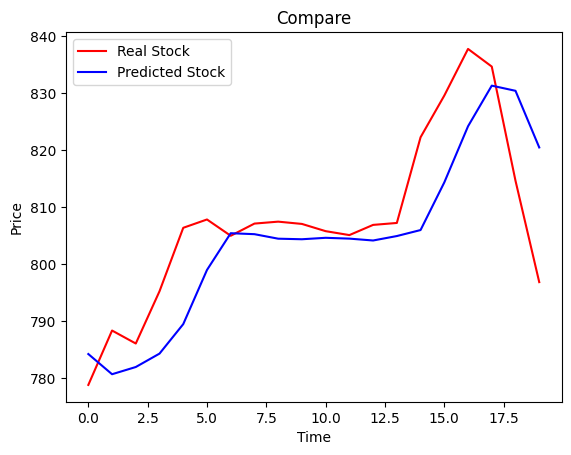

In [36]:
#Visualising the results

plt.plot(real_stock_price, color='red', label = 'Real Stock')
plt.plot(predict_stock_price, color='blue', label = 'Predicted Stock')
plt.title("Compare")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()